# Example 1 - Single Frequency Analysis

In [6]:
from CircuitCalculator.SimpleCircuit.styles.styling import select
select(style='DIN')
from CircuitCalculator.SimpleCircuit.Elements import Schematic, Resistor, Line, Ground, ACVoltageSource, Capacitor
from CircuitCalculator.Circuit.solution import TimeDomainSolution, ComplexSolution
from CircuitCalculator.SimpleCircuit.DiagramTranslator import circuit_translator
from CircuitCalculator.SimpleCircuit.DiagramSolution import single_frequency_complex_solution
from CircuitCalculator.SimpleAnalysis.TimeSeries import steady_state_voltage_timedomain_analysis, steady_state_current_timedomain_analysis, plot_timeseries_by_id
from CircuitCalculator.SimpleAnalysis.PointerDiagram import plot_pointer_by_id, voltage_pointer_diagram_analysis, current_pointer_diagram_analysis, power_pointer_diagram_analysis

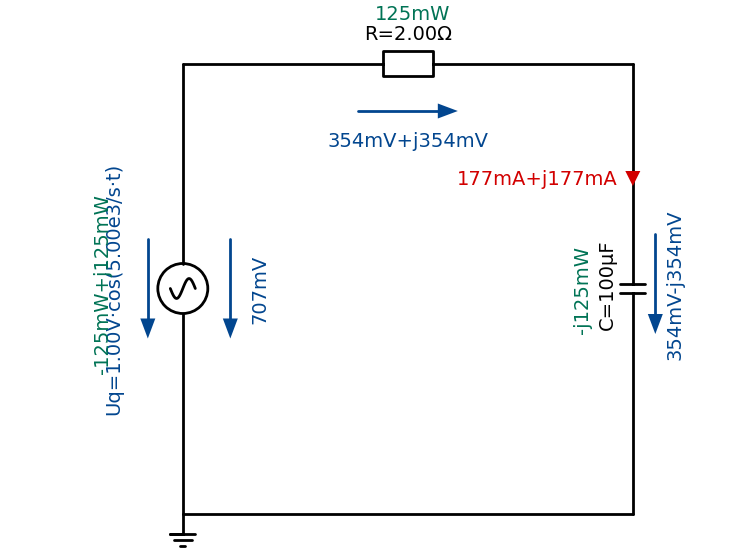

In [7]:
with Schematic(unit=9) as schematic:
    schematic += ACVoltageSource(V=1, w=5000, phi=0.0, reverse=True, name='Uq')
    schematic += Resistor(R=2, name='R').right()
    schematic += Capacitor(C=1e-4, name='C').down()
    schematic += Line().left()
    schematic += Ground()
    schematic_solution = single_frequency_complex_solution(schematic=schematic, w=5000)
    schematic += schematic_solution.draw_voltage('R')
    schematic += schematic_solution.draw_voltage('C')
    schematic += schematic_solution.draw_voltage('Uq')
    schematic += schematic_solution.draw_current('C')
    schematic += schematic_solution.draw_power('R')
    schematic += schematic_solution.draw_power('Uq')
    schematic += schematic_solution.draw_power('C')

In [8]:
solution = ComplexSolution(circuit_translator(schematic=schematic), w=5000)

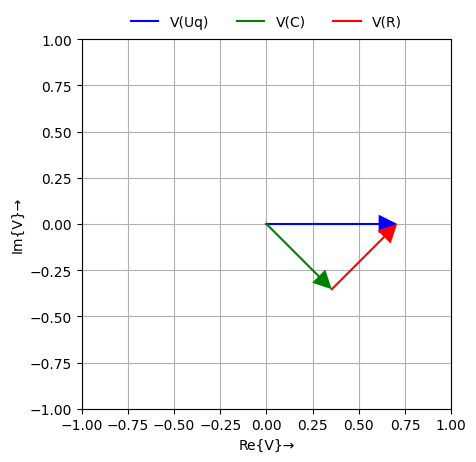

In [9]:
_ = voltage_pointer_diagram_analysis(
    plot_pointer_by_id('Uq', color='blue'),
    plot_pointer_by_id('C', color='green'),
    plot_pointer_by_id('R', origin='C', color='red'),
    solution=solution
)

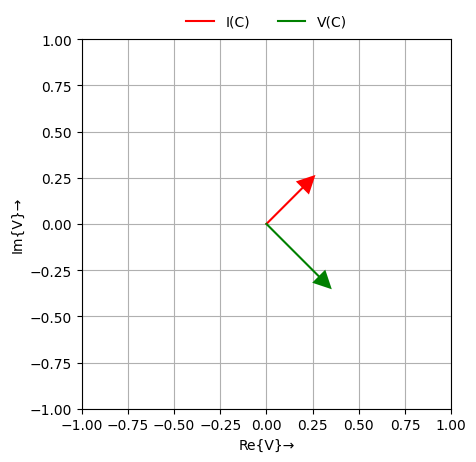

In [10]:
_ = voltage_pointer_diagram_analysis(
    plot_pointer_by_id('C', color='green'),
    solution=solution,
    layout_fcn=lambda : current_pointer_diagram_analysis(
        plot_pointer_by_id('C', scaling=1.5, color='red', label='I(C)'),
        solution=solution
    )
)

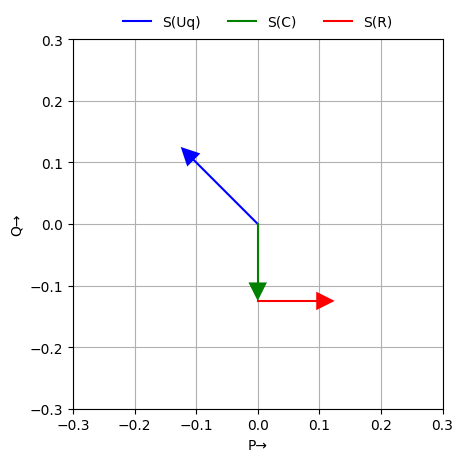

In [11]:
_ = power_pointer_diagram_analysis(
    plot_pointer_by_id('Uq', color='blue'),
    plot_pointer_by_id('C', color='green'),
    plot_pointer_by_id('R', origin='C', color='red'),
    solution=solution,
    pd_lim=(-0.3, 0.3, -0.3, 0.3)
)

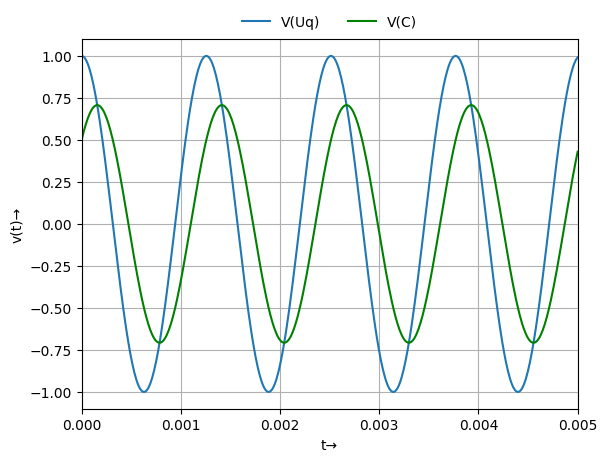

In [12]:
_ = steady_state_voltage_timedomain_analysis(
    plot_timeseries_by_id('Uq'),
    plot_timeseries_by_id('C', color='green'),
    solution=TimeDomainSolution(circuit_translator(schematic)),
    tmax=0.005
)

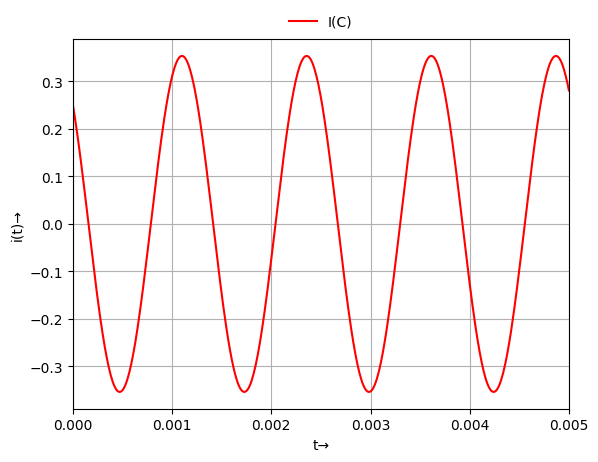

In [13]:
_ = steady_state_current_timedomain_analysis(
    plot_timeseries_by_id('C', color='red'),
    solution=TimeDomainSolution(circuit_translator(schematic)),
    tmax=0.005
)